In [10]:
import numpy as np
import matplotlib.pyplot as plt
import mne
import os
import sys
from mne.datasets import eegbci
import glob
from IPython.display import clear_output
import numpy as np
import torch
from torch import nn
import torch.optim as optim

from mne.datasets import eegbci
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from scipy import signal

import torch
import torch.cuda as cuda
import torch.nn as nn
from torch.autograd import Variable
import math


from mne import (io, compute_raw_covariance, read_events, pick_types, Epochs)
from mne.preprocessing import Xdawn
from common import EEG


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
import pandas as pd
import seaborn as sns
import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.time_frequency import tfr_multitaper
from mne.stats import permutation_cluster_1samp_test as pcluster_test

In [11]:
#runs =[[3,5,7,9],[4,6,8,10],[3,4,5,6,7,8,9,10]]
#session 1
#runs =[[3,5],[4,6],[3,4,5,6]]
#session 2
runs = [[7,9],[8,10],[7,8,9,10]]
runs_name = ['EX','MI',"ALL"]
subjects = [10]

freqs = np.arange(8, 14)  # frequencies from 2-35Hz
vmin, vmax = -1, 1.5  # set min and max ERDS values in plot
baseline = (0, 2)  # baseline interval (in s)
tmin, tmax = 0, 7
freq_bounds = {'_': 0,
               'delta': 3,
               'theta': 7,
               'alpha': 13,
               'beta': 35,
               'gamma': 140}

path = "/root/EEG_Model/dataset/finetune_EEG/"
base_url = 'https://physionet.org/files/eegmmidb/'
freq_bands_of_interest = ['delta', 'theta', 'alpha', 'beta']

**************** EX **********
**************** [7, 9] **********
/root/EEG_Model/dataset/finetune_EEG/
['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']
250.0
['C3', 'C4', 'STIM MARKERS']


/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R07.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R09.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R07.fif) does not conform to MNE naming conventions. A

['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']
250.0
['C3', 'C4', 'STIM MARKERS']
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 8 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 413 samples (1.652 sec)

120 events found
Event IDs: [1 2 4]
Not setting metadata
Not setting metadata
40 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 40 events and 1751 original time points ...
2 bad epochs dropped
Not setting metadata
Applying baseline correction (mode: percent)


/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R09.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/root/EEG_Model/common.py:280: RuntimeWarning: No matching events found for 3 (event id 3)
  epochs = mne.Epochs(


Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "freq" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...
**************** MI **********
**************** [8, 10] **********
/root/EEG_Model/dataset/finetune_EEG/
['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']
250.0
['C3', 'C4', 'STIM MARKERS']


/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R08.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R08.fif) does not conform to MNE naming conventions. A

['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']
250.0
['C3', 'C4', 'STIM MARKERS']
Filtering raw data in 2 contiguous segments
Setting up band-pass filter from 8 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 413 samples (1.652 sec)

120 events found
Event IDs: [1 2 4]
Not setting metadata
Not setting metadata
40 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 40 events and 1751 original time points ...
2 bad epochs dropped
Not setting metadata
Applying baseline correction (mode: percent)


/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/root/EEG_Model/common.py:280: RuntimeWarning: No matching events found for 3 (event id 3)
  epochs = mne.Epochs(


Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "freq" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...
**************** ALL **********
**************** [7, 8, 9, 10] **********
/root/EEG_Model/dataset/finetune_EEG/


/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R07.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R08.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R09.fif) does not conform to MNE naming conventions. A

['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']
250.0
['C3', 'C4', 'STIM MARKERS']


/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R07.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R08.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R09.fif) does not conform to MNE naming conventions. A

['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8', 'STIM MARKERS']
250.0
['C3', 'C4', 'STIM MARKERS']
Filtering raw data in 4 contiguous segments
Setting up band-pass filter from 8 - 14 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 14.00 Hz
- Upper transition bandwidth: 3.50 Hz (-6 dB cutoff frequency: 15.75 Hz)
- Filter length: 413 samples (1.652 sec)

240 events found
Event IDs: [1 2 4]
Not setting metadata
Not setting metadata
80 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 80 events and 1751 original time points ...
4 bad epochs dropped


/root/EEG_Model/common.py:255: RuntimeWarning: This filename (/root/EEG_Model/dataset/finetune_EEG/S010/S010R10.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif( path_file , preload=True, verbose='WARNING' )
/root/EEG_Model/common.py:280: RuntimeWarning: No matching events found for 3 (event id 3)
  epochs = mne.Epochs(


Not setting metadata
Applying baseline correction (mode: percent)
Converting "condition" to "category"...
Converting "epoch" to "category"...
Converting "freq" to "category"...
Converting "channel" to "category"...
Converting "ch_type" to "category"...


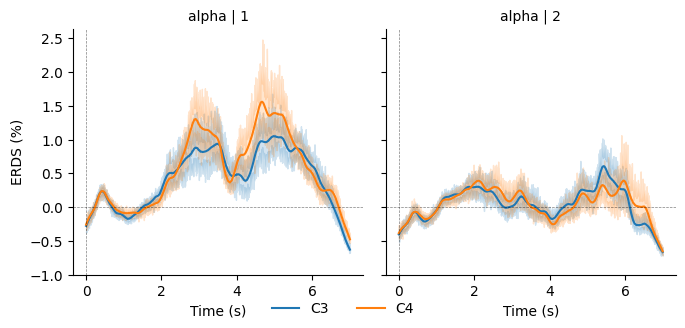

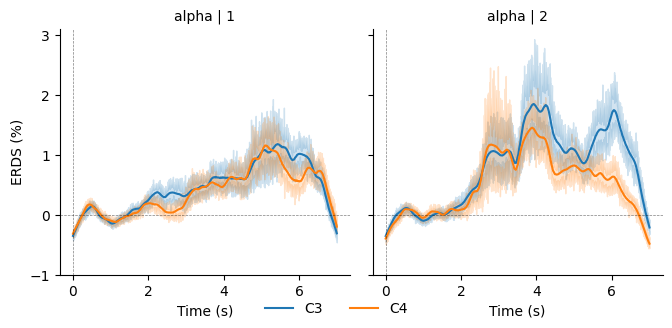

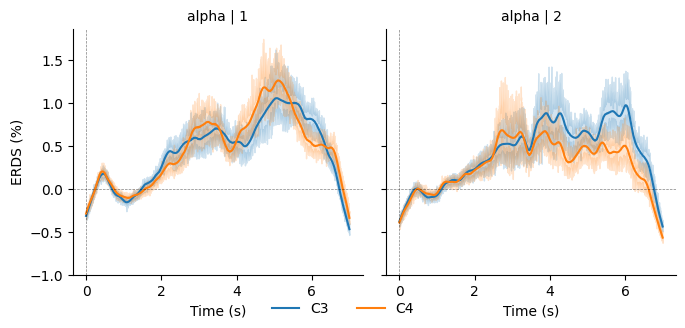

In [12]:
for i in range(len(runs)):
    print('**************** {} **********'.format(runs_name[i]))
    print('**************** {} **********'.format(runs[i]))
    eeg = EEG(path,subjects, runs[i])
    raw=eeg.data_to_raw()
    raw=raw.notch_filter([50,75,100])
    raw=raw.filter( 8,14, method='fir', verbose=20)
    raw.pick_channels(['C3','C4','STIM MARKERS'])
    epochs=eeg.epochs(raw,tmin=0,tmax=7,baseline=(0,2)) 
    event_ids = epochs.event_id
    
    cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS
    kwargs = dict(n_permutations=100, step_down_p=0.05, seed=1,
                  buffer_size=None, out_type='mask')  # for cluster test
    
    
    
    tfr = tfr_multitaper(epochs, freqs=freqs, n_cycles=freqs, use_fft=True,return_itc=False, average=False, decim=1)
    tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")
    df = tfr.to_data_frame(time_format=None, long_format=True)
    
    df['band'] = pd.cut(df['freq'], list(freq_bounds.values()),
                    labels=list(freq_bounds)[1:])
    

    
    df = df[df.band.isin(freq_bands_of_interest)]

    df['band'] = df['band'].cat.remove_unused_categories()

    # Order channels for plotting:
    df['channel'] = df['channel'].cat.reorder_categories(('C3', 'C4'),
                                                         ordered=True)
    
    g = sns.FacetGrid(df, row='band', col='condition')
    g.map(sns.lineplot, 'time', 'value', 'channel', n_boot=10)
    axline_kw = dict(color='black', linestyle='dashed', linewidth=0.5, alpha=0.5)
    g.map(plt.axhline, y=0, **axline_kw)
    g.map(plt.axvline, x=0, **axline_kw)
    g.set(ylim=(-1, None))
    g.set_axis_labels("Time (s)", "ERDS (%)")
    g.set_titles(col_template="{col_name}", row_template="{row_name}")
    g.add_legend(ncol=2, loc='lower center')
    g.fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.08)
    
    g.savefig("./ERD/{0}_ERD_S{1}.png".format(runs_name[i],subjects[0])) 
    g.fig#.clf()